#Feature Selection and Model Definition

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Preprocessed-Data.xlsx to Preprocessed-Data.xlsx


In [0]:
df = pd.read_excel("Preprocessed-Data.xlsx", index_col = 0)
df.head()


(7043, 40)

In [0]:
y = df.target
X = df.drop(['target'], axis = 1)

In [0]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 5)

xgb = xgb.XGBClassifier()

xgb_model = xgb.fit(X_train,y_train)

preds = xgb.predict(X_test)

acc = (accuracy_score(y_test, preds))
f1s = (f1_score(y_test,preds))
print(acc)
print(f1s)

0.807741935483871
0.5880184331797236


#Model Explainer for XGBoost

In [0]:
! pip install shap

In [0]:
import shap

In [0]:
XGB_explainer = shap.TreeExplainer(xgb_model)
XGB_shap_values = XGB_explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [0]:
%matplotlib

In [0]:
shap.initjs()
shap.force_plot(XGB_explainer.expected_value, XGB_shap_values[0,:], X.iloc[0,:])

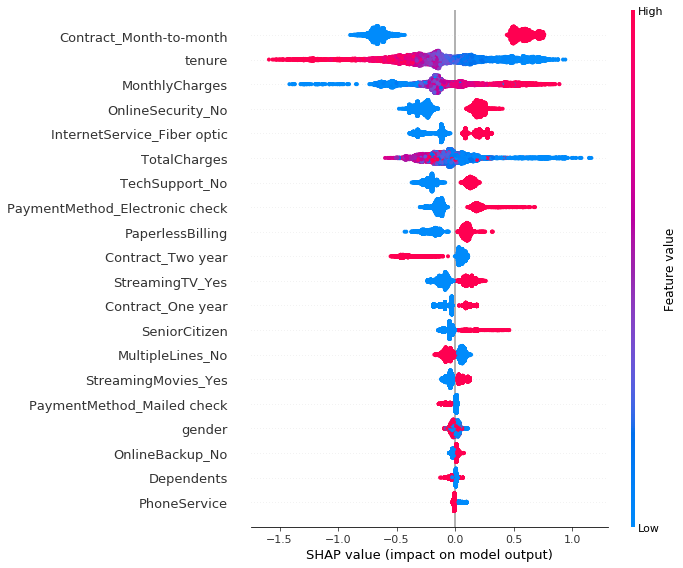

In [0]:
shap.initjs()
shap.summary_plot(XGB_shap_values, X)

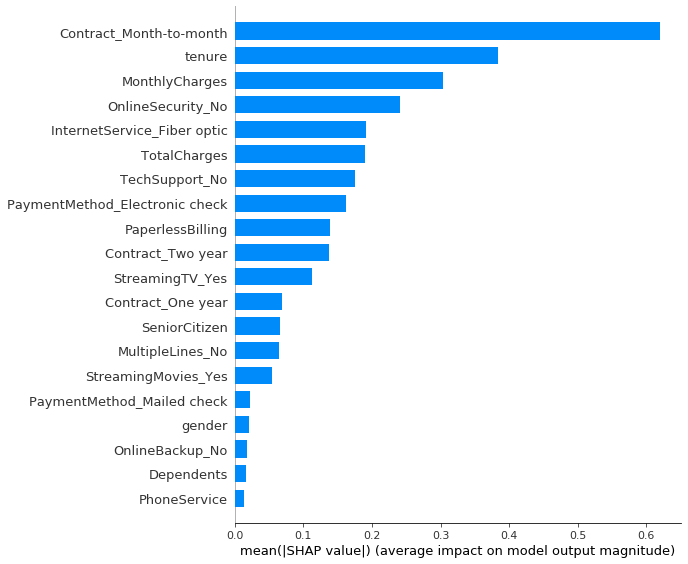

In [0]:
shap.initjs()
shap.summary_plot(XGB_shap_values, X, plot_type="bar")